In [1]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> stats_model_training func:
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    get_sig_features(data, sig

### <span style='color:green'> **[done]** </span>Loading Feature's-ready data

In [2]:
loc = '../data/'
#file = 'ufc_data_features.csv'
file = 'ufc_data_features_no_outliers.csv'
data = pd.read_csv(loc+file)
#data = data[data.columns[1:]]
data.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
5541,win,Aleksandra Albu,Kailin Curran,2017-07-29,Women's Strawweight,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903
5542,win,Jarred Brooks,Eric Shelton,2017-07-29,Flyweight,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573
5543,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903


#### <span style='color:green'> **[done]** </span>Filter by weight-class:

In [3]:
weight = 'Welterweight'
weight_classes = {'Flyweight':0,'Bantamweight':1,'Featherweight':2,
                  'Lightweight':3,'Welterweight':4,'Middleweight':5,
                  'Light Heavyweight':6,'Heavyweight':7,'Super Heavyweight':8,'Open Weight':9,
                  "Women's Strawweight":10,"Women's Flyweight":11,"Women's Bantamweight":12,
                  "Women's Featherweight":13}

df = data[data['weight class']==weight].reset_index(drop=True)
df.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
948,lose,Tom Breese,Sean Strickland,2016-06-04,Welterweight,S-DEC:,0.011068,-0.396675,0.011143,0.001133,-0.628768,-2.124978,-0.493996,0.758989,-1.401669,0.818039,-0.749613,-0.407408,0.985268,0.526935,0.599149,-0.010244
949,lose,Demian Maia,Tyron Woodley,2017-07-29,Welterweight,U-DEC:,-1.343474,-1.074278,0.011143,0.001133,0.804027,-0.551285,-0.862571,0.568310,-0.364213,-0.398160,-0.438214,0.770143,0.985268,-0.035262,1.743551,-0.010244
950,lose,Donald Cerrone,Robbie Lawler,2017-07-29,Welterweight,U-DEC:,0.011068,0.205639,0.405905,0.001133,0.291120,-1.075849,0.276662,1.140346,0.356946,0.007239,-0.132922,-0.491519,-1.616731,0.220282,0.026948,-0.010244


In [4]:
req_data = ['date','fighter','opponent','result','method']
y = ['kd_dif','str_dif','td_dif','sub_dif']
X = ['td avg._dif',
     'td acc._dif',
     'td def._dif',
     'sub. avg._dif',
     'slpm_dif',
     'str. acc._dif',
     'sapm_dif',
     'str. def_dif',
     'stance_win_ratio',
     'win_perc_dif',
     'win_strk_dif',
     'lose_strk_dif']
df = df[req_data + y + X]
df.head(3)

,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,2018-01-20,Abdul Razak Alhassan,Sabah Homasi,win,KO/TKO:Punch,1.365610,0.205639,-0.383618,0.001133,-0.974422,-0.166604,-0.460489,-0.003725,-0.901919,0.007239,-1.757078,0.770143,0.270739,1.727994,0.599149,-2.164903
1,2002-03-22,Jutaro Nakao,Sean Sherk,lose,U-DEC:,0.011068,-0.622543,-2.752188,0.001133,-2.061562,0.148134,0.008607,-0.385082,-1.047416,0.250479,-1.024376,-0.912072,0.985268,0.015847,0.026948,-0.010244
2,2013-05-18,Michel Prazeres,Paulo Thiago,lose,U-DEC:,0.011068,-0.584898,0.405905,0.001133,1.411710,0.183105,-0.527503,-0.575761,0.413880,0.655879,0.300594,-0.491519,0.270739,-1.108548,0.026948,-2.164903


### <span style='color:green'> **[done]** </span>Feature's significanse:

---------------------------------------------
Correlation Report: Most significant features
---------------------------------------------
R coef > Median R: [0.2, 0.39, 0.27, 0.27, 0.3, 0.59, 0.26, 0.39]
Most significant: ['slpm_dif', 'sapm_dif', 'slpm_dif', 'str. acc._dif', 'str. def_dif', 'sub. avg._dif', 'td avg._dif', 'td def._dif']


y,kd_dif,str_dif,sub_dif,td_dif
X,,,,
lose_strk_dif,0.06,0.02,0.04,0.02
sapm_dif,0.04,0.27,0.09,0.16
slpm_dif,0.2,0.39,0.02,0.08
stance_win_ratio,0.03,0.0,0.02,0.05
str. acc._dif,0.11,0.27,0.05,0.11
str. def_dif,0.11,0.3,0.02,0.14
sub. avg._dif,0.11,0.03,0.39,0.01
td acc._dif,0.08,0.09,0.05,0.15
td avg._dif,0.08,0.07,0.03,0.59


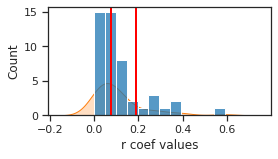

In [5]:
rdf = pd.DataFrame(columns=['y','X','r_coef'])
r_list = []
y_columns = ['kd_dif','str_dif','td_dif','sub_dif']
i = 0 
for y_column in y_columns:
    for x_column in X:
        rdf.loc[i, 'X'] = x_column
        rdf.loc[i, 'y'] = y_column
        rdf.loc[i, 'r_coef'] = np.round(np.abs(get_r_score(X=df[x_column], y=df[y_column])),2)
        r_list.append(rdf.loc[i, 'r_coef'])
        i += 1

rdf = rdf.pivot('X','y','r_coef')
print('---------------------------------------------')
print('Correlation Report: Most significant features')
print('---------------------------------------------')

sig_r =  [r for r in r_list if (r > (np.median(r_list)+np.std(r_list)) and r < 1)]
sig_features = get_sig_features(data=rdf, sig_r=sig_r)
print('R coef > Median R: %s' %(sig_r))
print('Most significant: %s' %(sig_features) )

g = plt.figure(figsize=(4,2))
g = sns.histplot(x = r_list, bins=len(rdf))
g = sns.kdeplot(x = r_list, fill=True)
plt.axvline(x = np.median(r_list)+np.std(r_list), color='red')
plt.axvline(x = np.median(r_list), color='red')
plt.xlabel("r coef values")
plt.ylabel("Count")

rdf

## <span style='color:green'> **[done]** </span> XGBoost regressor model training:

In [6]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(951, 22), train_set=(465, 12), validation_set=(187, 12), test_set=(299, 12)


,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
948,test,2016-06-04,Tom Breese,Sean Strickland,lose,S-DEC:,0.011068,-0.396675,0.011143,0.001133,-0.628768,-2.124978,-0.493996,0.758989,-1.401669,0.818039,-0.749613,-0.407408,0.985268,0.526935,0.599149,-0.010244
949,test,2017-07-29,Demian Maia,Tyron Woodley,lose,U-DEC:,-1.343474,-1.074278,0.011143,0.001133,0.804027,-0.551285,-0.862571,0.568310,-0.364213,-0.398160,-0.438214,0.770143,0.985268,-0.035262,1.743551,-0.010244
950,train,2017-07-29,Donald Cerrone,Robbie Lawler,lose,U-DEC:,0.011068,0.205639,0.405905,0.001133,0.291120,-1.075849,0.276662,1.140346,0.356946,0.007239,-0.132922,-0.491519,-1.616731,0.220282,0.026948,-0.010244


In [7]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
948,test,2016-06-04,Tom Breese,Sean Strickland,lose,S-DEC:,0.011068,-0.396675,0.011143,0.001133,-0.628768,-2.124978,-0.493996,0.758989,-1.401669,0.818039,-0.749613,-0.407408,0.985268,0.526935,0.599149,-0.010244,-0.272330,-0.272330,-0.272330,-0.272330
949,test,2017-07-29,Demian Maia,Tyron Woodley,lose,U-DEC:,-1.343474,-1.074278,0.011143,0.001133,0.804027,-0.551285,-0.862571,0.568310,-0.364213,-0.398160,-0.438214,0.770143,0.985268,-0.035262,1.743551,-0.010244,-0.623923,-0.623923,-0.623923,-0.623923
950,train,2017-07-29,Donald Cerrone,Robbie Lawler,lose,U-DEC:,0.011068,0.205639,0.405905,0.001133,0.291120,-1.075849,0.276662,1.140346,0.356946,0.007239,-0.132922,-0.491519,-1.616731,0.220282,0.026948,-0.010244,-0.013691,-0.013691,-0.013691,-0.013691


In [8]:
acc = []
for column in ['kd_dif','str_dif','td_dif','sub_dif']:
    act = df[column][df.set=='validation']
    pred = df[column+'_pred'][df.set=='validation'] 
    acc.append(np.round(get_mean_percentage_error(act=act, pred=pred),4))
    
print('Model Accuracy(=1 - (error/(normal range))): %f' %(np.mean(acc)))

Model Accuracy(=1 - (error/(normal range))): 0.848400


### <span style='color:orange'> **[in-progress]** </span>GridSearch (=Parameter tuning):

In [9]:
parameters = {'learning_rate': [0.05, 0.1, 0.15],
              'max_depth': [2, 3, 6],
              'subsample': [0.7, 0.8, 0.9],
              'n_estimators':[100, 200, 300]
}

xgboost_reg = XGBRegressor(objective='reg:squarederror') #objective='reg:squarederror')
grid_search = GridSearchCV(estimator=xgboost_reg, param_grid=parameters, cv=3,error_score='raise')

X_train = df[X][df.set=='train']
y_train = df[y][df.set=='train']
grid_search.fit(X_train,y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.9}
Best score:  0.19120786401271114


In [10]:
grid = pd.DataFrame(grid_search.cv_results_['params'])
#rmse = np.power(grid_search.cv_results_['mean_test_score'],0.5)

grid['squared_error'] = grid_search.cv_results_['mean_test_score'] #grid_search.cv_results_['mean_test_score']
g = grid[grid.squared_error==np.min(grid.squared_error)].reset_index(drop=True)
g

,learning_rate,max_depth,n_estimators,subsample,squared_error
0,0.15,3,300,0.8,-0.039815


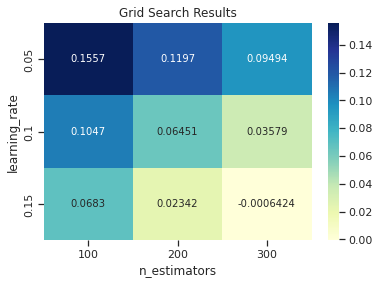

In [11]:
# Create a pivot table of the results
X_axis = 'n_estimators'
y_axis = 'learning_rate'
table = pd.pivot_table(grid, values='squared_error', index=y_axis, columns=X_axis)

# Create a heatmap plot of the results
sns.heatmap(table, cmap='YlGnBu', annot=True, fmt='.4g')
plt.title('Grid Search Results')
plt.xlabel(X_axis)
plt.ylabel(y_axis)
plt.show()


#### <span style='color:green'> **[done]** </span> Train model with chosen parameters:

In [12]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=g.loc[0,'n_estimators'], learning_rate=g.loc[0,'learning_rate'], subsample=g.loc[0,'subsample'], max_depth=g.loc[0,'max_depth'])
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
948,test,2016-06-04,Tom Breese,Sean Strickland,lose,S-DEC:,0.011068,-0.396675,0.011143,0.001133,-0.628768,-2.124978,-0.493996,0.758989,-1.401669,0.818039,-0.749613,-0.407408,0.985268,0.526935,0.599149,-0.010244,-0.542656,-0.542656,-0.542656,-0.542656
949,test,2017-07-29,Demian Maia,Tyron Woodley,lose,U-DEC:,-1.343474,-1.074278,0.011143,0.001133,0.804027,-0.551285,-0.862571,0.568310,-0.364213,-0.398160,-0.438214,0.770143,0.985268,-0.035262,1.743551,-0.010244,-0.335153,-0.335153,-0.335153,-0.335153
950,train,2017-07-29,Donald Cerrone,Robbie Lawler,lose,U-DEC:,0.011068,0.205639,0.405905,0.001133,0.291120,-1.075849,0.276662,1.140346,0.356946,0.007239,-0.132922,-0.491519,-1.616731,0.220282,0.026948,-0.010244,-0.079794,-0.079794,-0.079794,-0.079794


#### <span style='color:green'> **[done]** </span> Saving model as pickle:

In [13]:
save_trained_model(model=xgboost_reg,filename_path='../global_variables/stats_pred_' + weight + '_xgboost_reg')

../global_variables/stats_pred_Welterweight_xgboost_reg.pkl saved.


#### <span style='color:green'> **[done]** </span> Saving statistic prediction data:

In [ ]:
#df.to_csv('../data/fight_stat_data_trained.csv', index=None)
#print('../data/fight_stat_data_trained.csv saved.')

#### <span style='color:green'> **[done]** </span> Saving tuned parameters:

In [ ]:
param = pd.DataFrame(data={'ml_model':['stats_random_forest_regressor'],
                          'parameter_name':['n_estimators'],
                          'value':[opt_n_estimators],
                          'accuracy':[opt_acc]}
                    )

param.to_csv('../global_variables/ml_models_parameters.csv', index=None)
print('../global_variables/ml_models_parameters.csv saved.')

In [14]:
>>>

## <span style='color:green'> **[done]** </span> Random Forest regression model training:

In [15]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(951, 26), train_set=(470, 12), validation_set=(216, 12), test_set=(265, 12)


,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
948,train,2016-06-04,Tom Breese,Sean Strickland,lose,S-DEC:,0.011068,-0.396675,0.011143,0.001133,-0.628768,-2.124978,-0.493996,0.758989,-1.401669,0.818039,-0.749613,-0.407408,0.985268,0.526935,0.599149,-0.010244,-0.542656,-0.542656,-0.542656,-0.542656
949,train,2017-07-29,Demian Maia,Tyron Woodley,lose,U-DEC:,-1.343474,-1.074278,0.011143,0.001133,0.804027,-0.551285,-0.862571,0.568310,-0.364213,-0.398160,-0.438214,0.770143,0.985268,-0.035262,1.743551,-0.010244,-0.335153,-0.335153,-0.335153,-0.335153
950,test,2017-07-29,Donald Cerrone,Robbie Lawler,lose,U-DEC:,0.011068,0.205639,0.405905,0.001133,0.291120,-1.075849,0.276662,1.140346,0.356946,0.007239,-0.132922,-0.491519,-1.616731,0.220282,0.026948,-0.010244,-0.079794,-0.079794,-0.079794,-0.079794


In [16]:
rf_reg = set_random_forest_reg(X_columns=X, y_columns=y, data=df, n_estimators=10)
df = set_predictions(model=rf_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
948,train,2016-06-04,Tom Breese,Sean Strickland,lose,S-DEC:,0.011068,-0.396675,0.011143,0.001133,-0.628768,-2.124978,-0.493996,0.758989,-1.401669,0.818039,-0.749613,-0.407408,0.985268,0.526935,0.599149,-0.010244,-0.031073,-0.031073,-0.031073,-0.031073
949,train,2017-07-29,Demian Maia,Tyron Woodley,lose,U-DEC:,-1.343474,-1.074278,0.011143,0.001133,0.804027,-0.551285,-0.862571,0.568310,-0.364213,-0.398160,-0.438214,0.770143,0.985268,-0.035262,1.743551,-0.010244,-1.072566,-1.072566,-1.072566,-1.072566
950,test,2017-07-29,Donald Cerrone,Robbie Lawler,lose,U-DEC:,0.011068,0.205639,0.405905,0.001133,0.291120,-1.075849,0.276662,1.140346,0.356946,0.007239,-0.132922,-0.491519,-1.616731,0.220282,0.026948,-0.010244,-0.272999,-0.272999,-0.272999,-0.272999


In [17]:
acc = []
for column in ['kd_dif','str_dif','td_dif','sub_dif']:
    act = df[column][df.set=='validation']
    pred = df[column+'_pred'][df.set=='validation'] 
    acc.append(np.round(get_mean_percentage_error(act=act, pred=pred),4))
    
print('Model Accuracy(=1 - (error/(normal range))): %f' %(np.mean(acc)))

Model Accuracy(=1 - (error/(normal range))): 0.859350


#### <span style='color:green'> **[done]** </span> Tune Model parameters:

In [18]:
sum_table = pd.DataFrame(columns=['n_estimators','kd_accuracy','str_accuracy','td_accuracy','sub_accuracy','mean_accuracy'])

for n in tqdm([2,4,8,16,32,64,128,256]):
    sum_table = pd.concat([sum_table,get_grad_desc_step(X_columns=X, y_columns=y, data=df, n=n)],ignore_index=True)

sum_table.tail(5)

  0%|          | 0/8 [00:00<?, ?it/s]


NameError: name 'get_grad_desc_step' is not defined

In [ ]:
sns.scatterplot(data=sum_table, x='n_estimators', y='mean_accuracy')
sns.lineplot(data=sum_table, x='n_estimators', y='mean_accuracy')

t = sum_table[sum_table.mean_accuracy == np.max(sum_table['mean_accuracy'])].reset_index(drop=True)
opt_n_estimators = t.loc[0,'n_estimators']
opt_acc = t.loc[0,'mean_accuracy']
t

#### <span style='color:green'> **[done]** </span> Tuned model score:

In [ ]:
print('Model Accuracy(=1-percentage error):')
acc = []
for stat in ['kd','str','sub','td']:
    act = df[stat + '_dif'][df.set=='test']
    pred = df[stat + '_dif_pred'][df.set=='test']
    acc.append(get_mean_percentage_error(act=act, pred=pred))
    print(stat + '_dif Accuracy: ' + str(get_mean_percentage_error(act=act, pred=pred)))
print('\nOverall score: %.4f' %np.mean(acc))    